# Task 3: Superstore EXPLORATORY DATA ANALYSIS

---


Name: Jaswinder Singh

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import folium
import json
import requests

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
csv=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/SuperStore Exploratory Data Analysis/SampleSuperstore.csv")
csv

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Just reading the data, showing the head and tail of it.**

In [28]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**There are no NULL values, So data cleaning would be easy**

In [29]:
d=csv.duplicated()
print(csv[d].count())

Ship Mode       17
Segment         17
Country         17
City            17
State           17
Postal Code     17
Region          17
Category        17
Sub-Category    17
Sales           17
Quantity        17
Discount        17
Profit          17
dtype: int64


**There are duplicates.**

In [30]:
csv.drop_duplicates(inplace=True)
d=csv.duplicated()
csv[d].count()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**There are no duplicates.**

In [31]:
csv=csv.drop(['Country','Postal Code'],axis=1)

Country column had just 1 entry, US, so its useless and instead of postal codes, I thought showing data as cities and states would be easier and better.

In [32]:
print("Total Profit:$",csv['Profit'].sum())

Total Profit:$ 286241.4226


In [33]:
for col in csv.columns:
  print(col, len(csv[col].unique()))

Ship Mode 4
Segment 3
City 531
State 49
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


**Number of unique enteries in every column.**

In [34]:
# def colWithProfit(colName):
#   profit=[]
#   for x in csv[colName].unique():
#     sum=0
#     for i in csv.index:     
#       if csv[colName][i]==x:
#         sum+=csv['Profit'][i]
#     profit.append(sum)
#   return profit

*Just a Function I made to return a list, which shows profit respective to every unique entry of the provided column.*

But there are easier methods available.

In [35]:
def countUnique(colName):
  length=1
  for x in csv[colName].unique():
    count=0
    for i in csv.index:
      if csv[colName][i]==x:
        count+=1
    print(length,x,count)
    length+=1

Function which calculates how many times a unique entry of the provided column is shown in the data

In [36]:
catSubCat=[]
for sub in csv['Sub-Category'].unique():
  for i in csv.index:
    if csv['Sub-Category'][i]==sub:
      catSubCat.append([csv['Category'][i],sub])
      break
catSubCat.sort()
catSubCat

[['Furniture', 'Bookcases'],
 ['Furniture', 'Chairs'],
 ['Furniture', 'Furnishings'],
 ['Furniture', 'Tables'],
 ['Office Supplies', 'Appliances'],
 ['Office Supplies', 'Art'],
 ['Office Supplies', 'Binders'],
 ['Office Supplies', 'Envelopes'],
 ['Office Supplies', 'Fasteners'],
 ['Office Supplies', 'Labels'],
 ['Office Supplies', 'Paper'],
 ['Office Supplies', 'Storage'],
 ['Office Supplies', 'Supplies'],
 ['Technology', 'Accessories'],
 ['Technology', 'Copiers'],
 ['Technology', 'Machines'],
 ['Technology', 'Phones']]

Shows which Sub-Category belongs to which Category.

0 Bookcases 868
1 Chairs 2351
2 Labels 1396
3 Tables 1241
4 Storage 3158
5 Furnishings 3560
6 Art 2996
7 Phones 3289
8 Binders 5971
9 Appliances 1729
10 Paper 5144
11 Accessories 2976
12 Envelopes 906
13 Fasteners 914
14 Supplies 647
15 Machines 440
16 Copiers 234


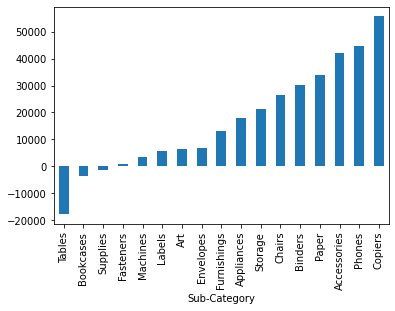

In [37]:
colName='Sub-Category'
csv.groupby(colName,axis=0).sum()['Profit'].sort_values().plot(kind='bar')
length=0
for x in csv[colName].unique():
    count=0
    for i in csv.index:
      if csv[colName][i]==x:
        count+=csv['Quantity'][i]
    print(length,x,count)
    length+=1

Sorted most profitable Sub-Categories.


1 Furniture 2118
2 Office Supplies 6012
3 Technology 1847


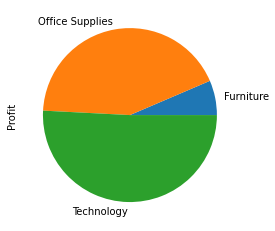

In [38]:
colName='Category'
csv.groupby(colName,axis=0).sum()['Profit'].plot(kind='pie')
countUnique(colName)

Furniture, covering more than 20% of sales, is not even providing 5% of the profits, whereas technology covering around 15% of sales, is providing more than 50% of the profit, Profit margin is highest in the technology market.
In most of the furniture, we are not even getting low profits, we are getting losses, "Tables" alone cost us  more than $18k Loss.


*We should focus on our Furniture Market.*


In [39]:
states=['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
       'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY']
#This list doesnt have Alaska (AK)
listProfit=[]
for i in range(49):
  listProfit.append(csv.groupby('State',axis=0).sum()['Profit'][i])

In [40]:
data={'States':states,'Profit':listProfit}
mapData=pd.DataFrame(data)
mapData.head()

,States,Profit
0,AL,5786.8253
1,AZ,-3427.9246
2,AR,4008.6871
3,CA,76330.7891
4,CO,-6527.8579


Necessary information for the upcoming Choropleth

In [41]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
us_states = f'{url}/us-states.json'
geo_json_data = json.loads(requests.get(us_states).text)

In [42]:
f = folium.Figure(width=640, height=480)
m = folium.Map(location=[43, -100], zoom_start=4).add_to(f)

folium.Choropleth(
    geo_data=us_states,
    data=mapData,
    columns=['States', 'Profit'],
    key_on='id',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    legend_name="Profit per State"
).add_to(m)
colName='State'
m

Choropleth of states with respect to profit.
As you can see, in west, we are doing fine, California and NewYork being our most profitable states, where as states like, Texas and Ohio, being the least profitable. 

We should focus on Least profitable states.

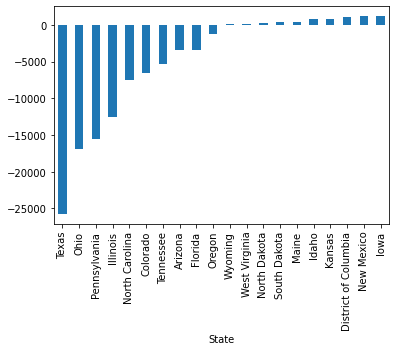

In [43]:
csv.groupby(colName,axis=0).sum()['Profit'].sort_values(ascending=True)[0:20].plot(kind='bar')
#Last 20 profitable States

Least profitable states, chart itself is pretty explanatory.

152179.81859999994

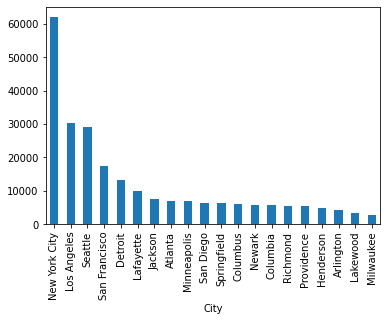

In [44]:
colName='City'
csv.groupby(colName,axis=0).sum()['Profit'].sort_values(ascending=False)[0:20].plot(kind='bar')
csv.groupby(colName,axis=0).sum()['Profit'].sort_values(ascending=False)[0:5].sum()

Top 20 Profitable Cites.
Top 5 Cities provide us more then half of our total profit. 

1 0.0 4787
2 0.45 11
3 0.2 3653
4 0.8 299
5 0.3 226
6 0.5 66
7 0.7 418
8 0.6 138
9 0.32 27
10 0.1 94
11 0.4 206
12 0.15 52


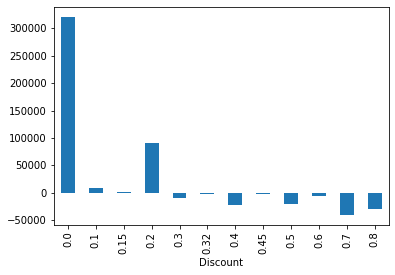

In [45]:
colName='Discount'
csv.groupby(colName,axis=0).sum()['Profit'].plot(kind='bar')
countUnique(colName)

**We can not afford discount**, or atleast more than 20%.

Its just loss after 20%

1 2 2399
2 3 2400
3 5 1230
4 7 606
5 4 1186
6 6 572
7 9 258
8 1 899
9 8 257
10 14 29
11 11 34
12 13 27
13 10 57
14 12 23


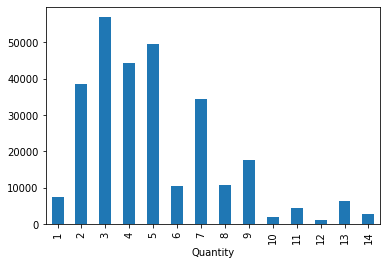

In [46]:
colName='Quantity'
csv.groupby(colName,axis=0).sum()['Profit'].plot(kind='bar')
countUnique(colName)

We should put our focus on retailing instead of whole sales. 
Lets try to find ways to go directly to the consumers.